## <center><strong><span style= 'color: #51fcc6'>Notebook </span>Describtion

In this notebook we will vizualize the issues in the data to determine what are the issues and how<br>
will they be fixed using SQL querries <sub>*(In the queries folder)</sub> also we will dive into the text data to find<br>
the issues.

#### **Important note:**
1. The feature extraction will be done using SQL with some data cleaning more about that in the queries<br>
   folder.
<br><br>
2. Most of the data manipulations in this notebook will be done using SQL commands inside the python <br>code.

#### **Table of contents:**
- Basic data graping & exploring
- Essential data cleaning
- Visualizing the data issues
- Cleaning the jobs data
- Cleaning the freelancing data
- Saving the data

## <center><strong>Importing the <span style= 'color: #48e0dc'>Packeges</span>

In [1]:
import os
import warnings
import matplotlib
import pandas             as pd
import numpy              as np
import seaborn            as sns
import matplotlib.pyplot  as plt

from google.cloud         import bigquery
from IPython.display      import set_matplotlib_formats

In [2]:
%matplotlib inline
set_matplotlib_formats('pdf', 'svg')
plt.rcParams['font.family'] = 'Candara'
# plt.rcParams['font.style'] = 'fantasy'

warnings.filterwarnings('ignore')

credentials_path :str = '../credentials.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = credentials_path

FONT             :int  = 17
COLORS           :list = ['#51fcc6', '#48e0dc', '#5cd3f7', '#4895e0', '#517afc']
NUMERICS         :list = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64',
                          'uint16', 'uint32', 'uint64']

C:\Users\FreeComp\AppData\Local\Temp\ipykernel_1172\2111437793.py:2: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('pdf', 'svg')


## <center><strong>Data reading & basic <span style= 'color: #5cd3f7'> Exploring

In [13]:
project_id :str = 'data-jobs-analysis-db'
dataset_id :str = 'data_jobs_analysis_db'

client   = bigquery.Client(project= project_id)

linkedin_jobs    = client.query(f'SELECT * FROM {dataset_id}.linkedin_jobs;').to_dataframe()
upwork_profiles  = client.query(f'SELECT * FROM {dataset_id}.upwork_profiles;').to_dataframe()
guru_profiles    = client.query(f'SELECT * FROM {dataset_id}.guru_profiles;').to_dataframe()

#### **LinkedIn data Exploring**

In [4]:
linkedin_jobs.sample(5)

,Unnamed: 0,jobs_locations,listing_dates,jobs_titles,companies_names,jobs_links,describtion,location_type,employment_type,industry,reqierd_credential,country,job_title,total_jobs
165,<NA>,"San Jose, CA",2023-05-19,Infra + AWS + Data Engineer - ONSITE,Pulivarthi Group (PG),https://www.linkedin.com/jobs/view/infra-%2B-a...,Follow us on Linkedin: https://www.linkedin.co...,None,FULL_TIME,Photography,bachelor degree,United States,Data engineer,76000
1334,<NA>,"San Ramon, CA",2023-03-28,Data Scientist,MoTek Technologies,https://www.linkedin.com/jobs/view/data-scient...,Computer Science / Hacking skills: 30%&lt;p&gt...,None,OTHER,Staffing and Recruiting,bachelor degree,European Union,Data scientist,142000
2295,<NA>,"San Jose, CA",2023-06-25,GCP Python Eng,"TekCapitol, Inc.",https://www.linkedin.com/jobs/view/gcp-python-...,Python Developer with micro-services developme...,None,FULL_TIME,IT Services and IT Consulting,bachelor degree,European Union,Data scientist,142000
22,<NA>,"San Ramon, CA",2023-07-13,HR Coordinator,Human Bees,https://www.linkedin.com/jobs/view/hr-coordina...,None,None,None,None,None,United States,Data entry,786000
1154,<NA>,"Sunnyvale, CA",2023-05-27,Python Developer,Emonics LLC,https://www.linkedin.com/jobs/view/python-deve...,&lt;ul&gt;&lt;li&gt;Title…….. Python Developer...,None,CONTRACTOR,Staffing and Recruiting,bachelor degree,United States,Data scientist,167000


In [5]:
linkedin_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3521 entries, 0 to 3520
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          0 non-null      Int64 
 1   jobs_locations      3521 non-null   object
 2   listing_dates       3414 non-null   object
 3   jobs_titles         3521 non-null   object
 4   companies_names     3521 non-null   object
 5   jobs_links          3521 non-null   object
 6   describtion         3455 non-null   object
 7   location_type       403 non-null    object
 8   employment_type     3455 non-null   object
 9   industry            3414 non-null   object
 10  reqierd_credential  3276 non-null   object
 11  country             3521 non-null   object
 12  job_title           3521 non-null   object
 13  total_jobs          3521 non-null   Int64 
dtypes: Int64(2), object(12)
memory usage: 392.1+ KB


from only those two methods we found that there are many proplems in this table just to<br> 
name a few with those methods only:
- Inconsistent DTypes
- Issues in the text data
- Many NAN values
- New useless column

& bunch more we will see after we dive more in the next sections.

#### **Guru data Exploring**

In [6]:
guru_profiles.sample(5)

,Unnamed: 0,describtion,earnings_amount,feedback,name,job_title,addresse,hour_rate,minimum_pay,skills,data_job_title
510,<NA>,Proficient user with decent experience in deal...,None,None,Anna Martirosyan,Data Analyst,"Yerevan, Yerevan, Armenia",$9/hr\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\...,Starting at\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\...,"['Data Analyst', 'Analytics', 'Creative Design...",Data Analyst
714,<NA>,I am an experienced Data Analytics Professiona...,None,None,Nivas Kandasamy,Experienced Data Analyst professional,"Chennai, Tamil Nadu, India",$14/hr\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...,Starting at\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\...,"['Data Analyst', 'Analytics', 'Data Analysis',...",Data Analyst
1169,<NA>,Dear client I'm Ana experienced data scientist...,None,None,Joseph Kiragu 1,"Data scientist, wen developer, programme","Nyeri, Central, Kenya",$12/hr\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...,Starting at\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\...,"['Data Scientist', 'Data Management', 'Mobile ...",Data scientist
1204,<NA>,Pro-active and motivated professional with 6 y...,None,None,BismiD,SAS Data Analyst/Internet Search Expert,"Wayanad, Kerala, India",$20/hr\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...,Starting at\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\...,"['Data Analyst', 'Data Analysis', 'Data Manage...",Data Analyst
910,<NA>,"Expert data scientist, statistician and market...",None,None,Res Sur,"""Black belt"" data scientist - researcher","Skopje, Karpos, Macedonia",$30/hr\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...,Starting at\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\...,"['Data Scientist', 'Access', 'Analytics', 'EVi...",Data scientist


In [7]:
guru_profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       0 non-null      Int64 
 1   describtion      1900 non-null   object
 2   earnings_amount  215 non-null    object
 3   feedback         99 non-null     object
 4   name             1900 non-null   object
 5   job_title        1900 non-null   object
 6   addresse         1900 non-null   object
 7   hour_rate        1900 non-null   object
 8   minimum_pay      1900 non-null   object
 9   skills           1900 non-null   object
 10  data_job_title   1900 non-null   object
dtypes: Int64(1), object(10)
memory usage: 165.3+ KB


Oh we can find that this table is even more worse than the previous one. 

#### **UpWork data Exploring**

In [8]:
upwork_profiles.sample(5)

,Unnamed: 0,describtion,earnings_amount,feedback,name,job_title,country,hour_rate,consultations_offers,skills,data_job_title
815,<NA>,⭐𝗘𝗫𝗣𝗘𝗥𝗧-𝗩𝗘𝗧𝗧𝗘𝗗 𝗧𝗢𝗣-𝟭% 𝗢𝗡 𝗨𝗣𝗪𝗢𝗥𝗞⭐ Data Analytic...,$400K+,98.0,Eugene A.,PhD | Data Scientist/Analyst | Statistician | ...,United Arab Emirates,$70.00,Offers consultations,"['Offers consultations', 'Data Analysis', 'Dat...",Data scientist
213,<NA>,"Professional in chemistry, with different know...",$500+,100.0,Lorena P.,"Data entry, scripting, forms developer",Colombia,$5.00,Doesn't offer consultations,"['Accuracy Verification', 'Data Mining', 'Micr...",Data entry
752,<NA>,👋 Hello there! Are you looking to automate you...,None,94.0,Mohamed W.,Google Data Studio | Excel | Google Sheets | G...,United Kingdom,$45.00,Doesn't offer consultations,"['Dashboard', 'Data Analysis', 'Data Interpret...",Data Analyst
194,<NA>,"Hello, it’s Danish Faiz here. Are you looking ...",None,96.0,Danish F.,Machine Learning | Deep Learning | Computer Vi...,Pakistan,$40.00,Offers consultations,"['Offers consultations', 'Machine Learning Mod...",Machine Learning
828,<NA>,I thrive on developing machine learning and de...,$1K+,79.0,Younes A.,Data Scientist | Machine Learning Engineer,Algeria,$25.00,Doesn't offer consultations,"['Machine Learning Model', 'Machine Learning',...",Machine Learning


In [9]:
upwork_profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            0 non-null      Int64  
 1   describtion           950 non-null    object 
 2   earnings_amount       791 non-null    object 
 3   feedback              870 non-null    float64
 4   name                  950 non-null    object 
 5   job_title             950 non-null    object 
 6   country               950 non-null    object 
 7   hour_rate             950 non-null    object 
 8   consultations_offers  950 non-null    object 
 9   skills                950 non-null    object 
 10  data_job_title        950 non-null    object 
dtypes: Int64(1), float64(1), object(9)
memory usage: 82.7+ KB


Wow until now this is the most clean table but we will stillwe didn't do the full exploring yet.

## <center><strong>Data issues <span style= 'color: #4895e0'> Visualization

In [14]:
linkedin_jobs   = linkedin_jobs.loc[:, ~linkedin_jobs.columns.str.contains('^Unnamed')]
guru_profiles   = guru_profiles.loc[:, ~guru_profiles.columns.str.contains('^Unnamed')]
upwork_profiles = upwork_profiles.loc[:, ~upwork_profiles.columns.str.contains('^Unnamed')]

In [24]:
cm = sns.color_palette('Greens', as_cmap= True)

In [25]:
cm.Blues

AttributeError: 'LinearSegmentedColormap' object has no attribute 'Blues'

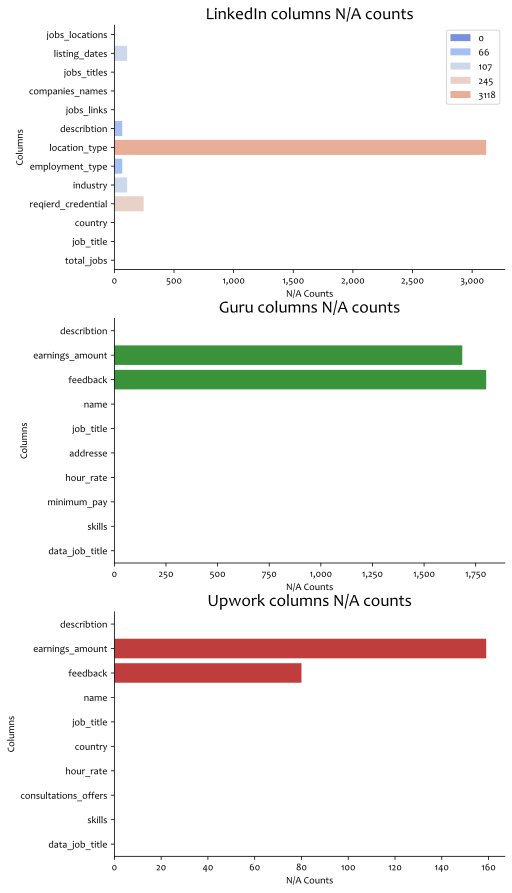

In [52]:
fig, axes = plt.subplots(3, 1)

linkedin_null_count = []
guru_null_count = []
upwork_null_count = []

for col in linkedin_jobs.columns:
    linkedin_null_count.append(linkedin_jobs[col].isnull().sum())

for col in guru_profiles.columns:
    guru_null_count.append(guru_profiles[col].isnull().sum())

for col in upwork_profiles.columns:
    upwork_null_count.append(upwork_profiles[col].isnull().sum())

    
palette = sns.color_palette("coolwarm")

sns.barplot(x= linkedin_null_count, y= linkedin_jobs.columns,
            palette= palette, ax= axes[0], hue= linkedin_null_count,
            dodge= False)

sns.barplot(x= guru_null_count, y= guru_profiles.columns,
            color= sns.color_palette()[2], ax= axes[1],
            dodge= False)

sns.barplot(x= upwork_null_count, y= upwork_profiles.columns,
            color= sns.color_palette()[3], ax= axes[2],
            dodge= False)


axes[0].set_title("LinkedIn columns N/A counts", fontsize=FONT)
axes[1].set_title("Guru columns N/A counts",     fontsize=FONT)
axes[2].set_title("Upwork columns N/A counts",   fontsize=FONT)

# Customize the plots
for ax in fig.axes:
    plt.sca(ax)
    plt.xlabel("N/A Counts")
    plt.ylabel("Columns")
    sns.despine()  # Remove the left spine
    ax.get_xaxis().set_major_formatter(
        plt.FuncFormatter(lambda x, p: format(int(x), ',')))

fig.set_size_inches(7, 15)
# plt.savefig("plots/null_counts_detailed.png")
plt.show()

`Unnamed: 0` column refers to the total records counts.

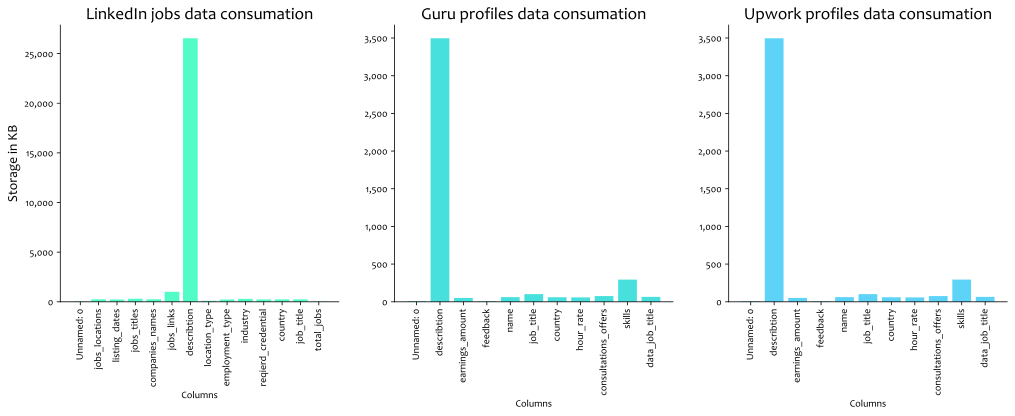

In [91]:
fig, axes = plt.subplots(1, 3)

linkedin_consumation = linkedin_jobs   .memory_usage(index= False, deep= True).values // 1024
linkedin_cols        = linkedin_jobs   .memory_usage(index= False, deep= True).index

guru_consumation     = upwork_profiles .memory_usage(index= False, deep= True).values // 1024
guru_cols            = upwork_profiles .memory_usage(index= False, deep= True).index

upwork_consumation   = upwork_profiles .memory_usage(index= False, deep= True).values // 1024
upwork_cols          = upwork_profiles .memory_usage(index= False, deep= True).index

axes[0].bar(x= linkedin_cols,  height= linkedin_consumation,  color= COLORS[0])
axes[1].bar(x= guru_cols,      height= guru_consumation,      color= COLORS[1])
axes[2].bar(x= upwork_cols,    height= upwork_consumation,    color= COLORS[2])

axes[0].set_title("LinkedIn jobs data consumation"  , fontsize= FONT)
axes[1].set_title("Guru profiles data consumation"  , fontsize= FONT)
axes[2].set_title("Upwork profiles data consumation", fontsize= FONT)

axes[0].set_ylabel("Storage in KB", fontsize = FONT * 4/5)

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)
    plt.xlabel("Columns")
    
    ax.spines[['right', 'top']].set_visible(False)
    ax.get_yaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    
fig.set_size_inches(17, 5)
plt.show()

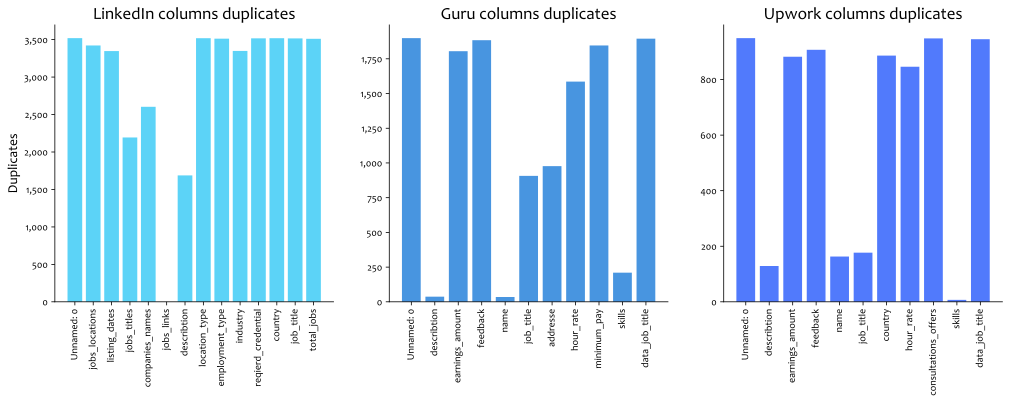

In [101]:
fig, axes = plt.subplots(1, 3)

linkedin_duplicates = linkedin_jobs   .apply(lambda x: x.duplicated().sum())
guru_duplicates     = guru_profiles   .apply(lambda x: x.duplicated().sum())
upwork_duplicates   = upwork_profiles .apply(lambda x: x.duplicated().sum())

axes[0].bar(x= linkedin_duplicates.index,  height= linkedin_duplicates.values,  color= COLORS[2])
axes[1].bar(x= guru_duplicates.index,      height= guru_duplicates.values,      color= COLORS[3])
axes[2].bar(x= upwork_duplicates.index,    height= upwork_duplicates.values,    color= COLORS[4])

axes[0].set_title("LinkedIn columns duplicates"  , fontsize= FONT)
axes[1].set_title("Guru columns duplicates"  ,     fontsize= FONT)
axes[2].set_title("Upwork columns duplicates",     fontsize= FONT)

axes[0].set_ylabel("Duplicates", fontsize= FONT * 4/5)

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)
    
    ax.spines[['right', 'top']].set_visible(False)
    ax.get_yaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    
fig.set_size_inches(17, 5)
plt.show()

In [109]:
import sys
sys.getsizeof(list(linkedin_jobs['describtion'].str.cat()))

123935560

In [120]:
from collections import Counter

def get_top_non_english_chars(char_list):
    # Step 1: Count the occurrences of each character
    char_counts = Counter(char_list)

    # Step 2: Filter out English characters (assuming ASCII range 0-127)
    non_english_chars = {char: count for char, count in char_counts.items() if ord(char) > 127}

    # Step 3: Sort characters based on their occurrence count in descending order
    sorted_chars = sorted(non_english_chars.items(), key=lambda item: item[1], reverse=True)

    # Step 4: Take the top 10 characters as a dictionary
    top_15_chars = dict(sorted_chars[:15])

    return top_15_chars

get_top_non_english_chars(list(linkedin_jobs['describtion'].str.cat()))

{'’': 5679,
 '–': 750,
 '—': 681,
 '•': 549,
 '”': 535,
 '“': 508,
 '\u202f': 457,
 '\u2002': 425,
 '\xa0': 185,
 '…': 159,
 '\xad': 93,
 '®': 84,
 '·': 83,
 'é': 70,
 '●': 68}